In [19]:
%system kaggle datasets download -d snehaanbhawal/resume-dataset

['Dataset URL: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset',
 'License(s): CC0-1.0',
 'resume-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [21]:
%system unzip 'resume-dataset.zip'

['Archive:  resume-dataset.zip',
 'replace Resume/Resume.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL',
 '(EOF or read error, treating as "[N]one" ...)']

In [23]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd

# Load the dataset
file_path = "./Resume/Resume.csv"  
pd.set_option("display.max_rows", 10) 
pd.set_option("display.max_columns", None)
data = pd.read_csv(file_path)

data

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [38]:
%pip install -U langchain-community
%pip install -qU langchain-openai

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [44]:
from dotenv import load_dotenv
import os

load_dotenv()
openai_api_key = os.getenv('OPENAI_API_KEY')

In [46]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model="gpt-4")

In [56]:
limited_data = data.iloc[:2]
limited_data

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR


In [72]:
def extract_skills(resume_text, llm: ChatOpenAI):
    prompt = f"Extract the skills from the following resume text:\n\n{resume_text}. Format the response as a CSV"
    response = llm.invoke(prompt)
    return response

# Apply the function to your dataset
extracted = limited_data['Resume_str'].apply(lambda x: extract_skills(x, llm))
extracted

0    content='"HR Administration, Customer Service ...
1    content='"Adobe Photoshop, ADP, Asset Manageme...
Name: Resume_str, dtype: object

In [104]:
skills_list = extracted.map(lambda x: x.content.split(',')).map(lambda x: [s.strip() for s in x])
all_skills = [skill for sublist in skills_list for skill in sublist]
all_skills


['"HR Administration',
 'Customer Service Management',
 'Team Management',
 'Marketing',
 'Conflict Resolution',
 'Training and Development',
 'Multi-tasking',
 'Client Relations',
 'Policy Development',
 'Compensation Management',
 'Labor Relations',
 'Benefits Management',
 'Employee Services',
 'Documentation',
 'Record Keeping',
 'Employee Relations',
 'Insurance Management',
 'Pension Plans Management',
 'Vacation Management',
 'Sick Leave Management',
 'Employee Assistance',
 'Collateral Design',
 'Advertising',
 'Website Design',
 'Social Media Management',
 'Competitor Analysis',
 'Medical Billing',
 'ICD-9',
 'CPT',
 'Medical Terminology',
 'Data Analysis',
 'Budgeting',
 'Financial Management',
 'Accounting',
 'Payroll Management',
 'Purchasing',
 'Public Relations',
 'Customer Service',
 'Front-end Operations',
 'Business Administration',
 'Marketing/Advertising',
 'Accounting',
 'Analytical Skills',
 'Benefits Management',
 'Billing',
 'Budgeting',
 'Client Service',
 'Data

In [107]:
import pandas as pd
from collections import Counter

skill_counts = Counter(all_skills)
skill_counts

Counter({'Marketing': 3,
         'Policy Development': 2,
         'Labor Relations': 2,
         'Benefits Management': 2,
         'Documentation': 2,
         'Employee Relations': 2,
         'Insurance Management': 2,
         'Medical Billing': 2,
         'Medical Terminology': 2,
         'Data Analysis': 2,
         'Budgeting': 2,
         'Financial Management': 2,
         'Accounting': 2,
         'Purchasing': 2,
         'Public Relations': 2,
         'Reporting': 2,
         '"HR Administration': 1,
         'Customer Service Management': 1,
         'Team Management': 1,
         'Conflict Resolution': 1,
         'Training and Development': 1,
         'Multi-tasking': 1,
         'Client Relations': 1,
         'Compensation Management': 1,
         'Employee Services': 1,
         'Record Keeping': 1,
         'Pension Plans Management': 1,
         'Vacation Management': 1,
         'Sick Leave Management': 1,
         'Employee Assistance': 1,
         'Collater

In [109]:
top_skills = skill_counts.most_common(10)
skills, counts = zip(*top_skills)

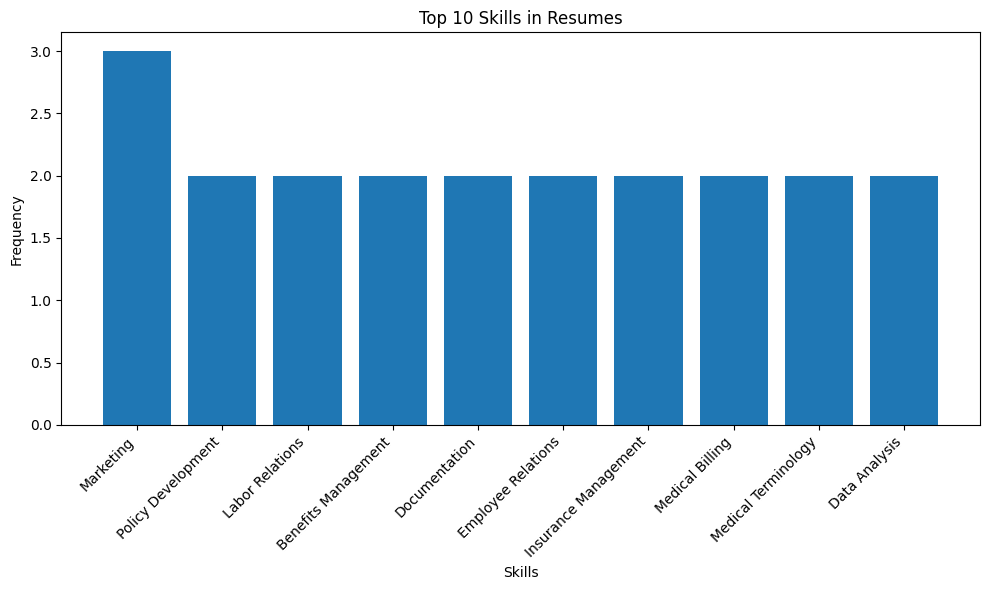

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(skills, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Skills in Resumes")
plt.ylabel("Frequency")
plt.xlabel("Skills")
plt.tight_layout()
plt.show()